# Fully connected two-layer classifier network

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Activation
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.optimizers import SGD
import cv2

4423680/4422102 [==============================] - 0s 0us/step


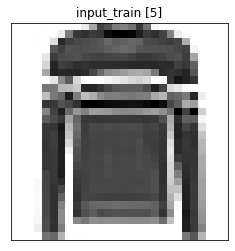

In [2]:
mnist =tf.keras.datasets.fashion_mnist  # load mnist dataset from tensorflow
(input_train, output_train_class), (input_test, output_test_class) = mnist.load_data()
input_train= input_train.reshape(input_train.shape[0], 28, 28, 1)  # add an extra dimension to array
input_test= input_test.reshape(input_test.shape[0], 28, 28, 1)

input_train = input_train / 255.0  # max normalise the image data[0:1]
input_test = input_test / 255.0

output_train = np.copy(input_train).reshape(len(input_train),784)  # 
output_test = np.copy(input_test).reshape(len(input_test),784)

item_id = 5
plt.imshow(input_train[item_id, :, :, 0], cmap=plt.cm.binary)
plt.title('input_train [' + str(item_id) + ']')
plt.grid(None)
plt.xticks([])
plt.yticks([])
plt.show()

In [3]:
optimizer_type = SGD(lr=1)  # optimisation algorithm: SGD stochastic gradient decent 
loss = 'binary_crossentropy'  # loss (cost) function to be minimised by the optimiser
metrics = ['binary_accuracy']  # network accuracy metric to be determined after each epoch
dropout_ratio = 0.0  # % of nodes in the hidden layer to dropout during back-propagation update of the network weights
validtrain_split_ratio = 0.2  # % of the seen dataset to be put aside for validation, rest is for training
max_epochs = 200  # maxmimum number of epochs to be iterated
batch_size = 100   # batch size for the training data set
batch_shuffle = True   # shuffle the training data prior to batching before each epoch
num_hidden_nodes = 200  # number of nodes in hidden fully connected layer

In [4]:
input_shape = (28, 28, 1)
inputs = Input(shape=input_shape)

flatten = Flatten()(inputs)   # 784 nodes = 28x28

dense_01 = Dense(num_hidden_nodes)(flatten)
dense_01 = Activation('sigmoid')(dense_01)
dense_01 = Dropout(dropout_ratio)(dense_01)

dense_02 = Dense(784)(dense_01)
outputs = Activation('sigmoid')(dense_02)


* Compiling the network model *

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 200)               157000    
_________________________________________________________________
activation (Activation)      (None, 200)               0         
_________________________________________________________________
dropout (Dropout)            (None, 200)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 784)               157584    
_________________________________________________________________
activation_1 (Activation)  

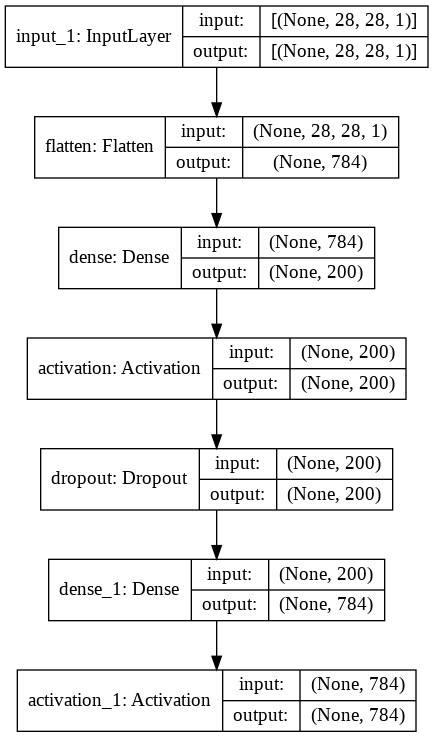

In [5]:
print()
print('* Compiling the network model *')
print()

model = Model(inputs=inputs, outputs=outputs)
model.compile(optimizer=optimizer_type, loss=loss, metrics=metrics)

# display a summary of the compiled neural network

print(model.summary())  
print()

# create and save a schematic image of the network architecture

from tensorflow.keras.utils import plot_model
from IPython.display import Image

print('Graphical schematic of the compiled network')
print()

plot_model(model, show_shapes=True, show_layer_names=True, to_file='model.png')
Image(filename='model.png')

In [6]:
print('* Training the compiled network *')
print()
history = model.fit(input_train, output_train, \
                    batch_size=batch_size, \
                    epochs=max_epochs, \
                    validation_split=validtrain_split_ratio, \
                    shuffle=batch_shuffle)

print()
print('Training completed')
print()

* Training the compiled network *

Epoch 1/200
480/480 [==============================] - 5s 4ms/step - loss: 0.5421 - binary_accuracy: 0.4594 - val_loss: 0.4694 - val_binary_accuracy: 0.4900
Epoch 2/200
480/480 [==============================] - 2s 4ms/step - loss: 0.4547 - binary_accuracy: 0.4952 - val_loss: 0.4224 - val_binary_accuracy: 0.4946
Epoch 3/200
480/480 [==============================] - 2s 3ms/step - loss: 0.4147 - binary_accuracy: 0.4965 - val_loss: 0.4001 - val_binary_accuracy: 0.4948
Epoch 4/200
480/480 [==============================] - 2s 3ms/step - loss: 0.3965 - binary_accuracy: 0.4960 - val_loss: 0.3887 - val_binary_accuracy: 0.4947
Epoch 5/200
480/480 [==============================] - 2s 3ms/step - loss: 0.3855 - binary_accuracy: 0.4975 - val_loss: 0.3805 - val_binary_accuracy: 0.4955
Epoch 6/200
480/480 [==============================] - 2s 3ms/step - loss: 0.3779 - binary_accuracy: 0.4974 - val_loss: 0.3735 - val_binary_accuracy: 0.4966
Epoch 7/200
480/480 [==

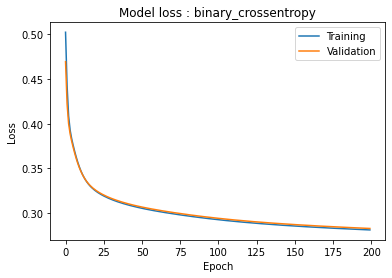

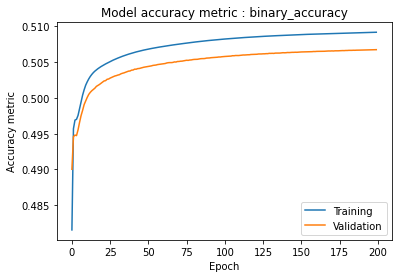

In [7]:
# model loss

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss : ' + loss)
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='best')
plt.show()
plt.close()

# model accuracy metric

plt.plot(np.array(history.history[metrics[0]]))
plt.plot(np.array(history.history['val_' + metrics[0]]))
plt.title('Model accuracy metric : ' + metrics[0])
plt.ylabel('Accuracy metric')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='best')
plt.show()
plt.close()

### Evaluate the trained network performance on the unseen test dataset

* the performance of the trained network on unseen data can be assessed using: .evaluate()

In [8]:
print('* Evaluating the performance of the trained network on the unseen test dataset *')
print()

evaluate_model = model.evaluate(x=input_test, y=output_test)
loss_metric = evaluate_model [0]
accuracy_metric = evaluate_model [1]

print()
print('Accuracy - ' + metrics[0] + ': %0.3f'%accuracy_metric)
print('Loss - ' + loss + ': %0.3f'%loss_metric)

* Evaluating the performance of the trained network on the unseen test dataset *

313/313 [==============================] - 1s 3ms/step - loss: 0.2837 - binary_accuracy: 0.5065

Accuracy - binary_accuracy: 0.507
Loss - binary_crossentropy: 0.284


T-shirt


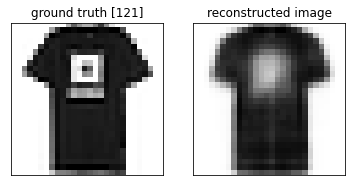

Ankle boot


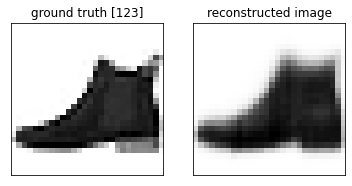

Dress


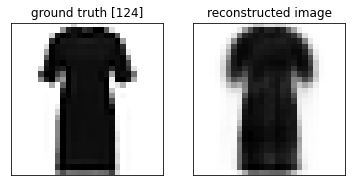

Bag


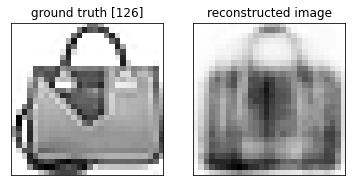

Coat


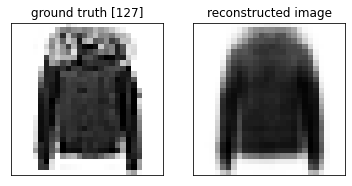

Trouser


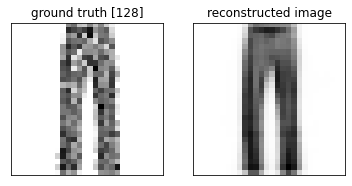

Sandal


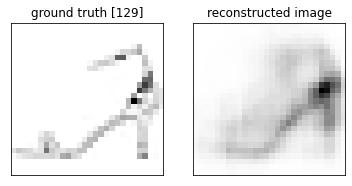

Shirt


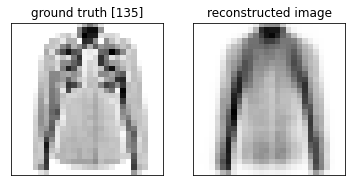

Pullover


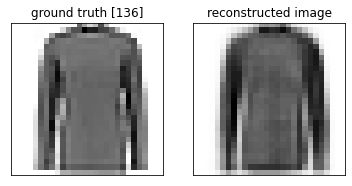

In [9]:
name=['T-shirt', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

test_ids = [121,123,124,126,127,128,129,135,136]
for test_id in test_ids:
  input_predict = np.zeros(shape=(1, 28, 28, 1))  # create numpy array of required dimensions for network input

  input_predict[0, :, :, 0] = input_test[test_id, :, :, 0]  # reshaping test input image
  print(name[output_test_class[test_id]])
  output_predict = model.predict(input_predict).reshape(28,28)  # softmax distribution of predicted class

  plt.subplot(122);plt.imshow(output_predict, cmap=plt.cm.binary)
  plt.title('reconstructed image')
  plt.grid(None)
  plt.xticks([])
  plt.yticks([])
  plt.subplot(121);plt.imshow(input_test[test_id, :, :, 0], cmap=plt.cm.binary)
  plt.title('ground truth [' + str(test_id) + ']')
  plt.grid(None)
  plt.xticks([])
  plt.yticks([])
  plt.show()

In [ ]:
### SAME with batch size 50 works better than 100!

# 2: Blurred database

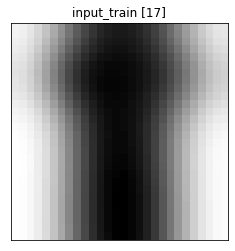

In [13]:
mnist =tf.keras.datasets.fashion_mnist  # load mnist dataset from tensorflow
(input_train, output_train_class), (input_test, output_test_class) = mnist.load_data()
input_train= input_train.reshape(input_train.shape[0], 28, 28, 1)  # add an extra dimension to array
input_test= input_test.reshape(input_test.shape[0], 28, 28, 1)

kernel_size=(19,19)
noisy_train=  [cv2.GaussianBlur(im, kernel_size,0) for im in input_train]
noisy_test=  [cv2.GaussianBlur(im, kernel_size,0) for im in input_test]

output_train = np.copy(input_train).reshape(len(input_train),784)/255.0  # 
output_test = np.copy(input_test).reshape(len(input_test),784)/255.0


input_test_keep=np.copy(input_test) /255.0
input_train = np.array(noisy_train) / 255.0  # max normalise the image data[0:1]
input_test = np.array(noisy_test) / 255.0

item_id = 17
plt.imshow(input_train[item_id, :, :], cmap=plt.cm.binary)
plt.title('input_train [' + str(item_id) + ']')
plt.grid(None)
plt.xticks([])
plt.yticks([])
plt.show()

# 3: Unblurring two-layer network

In [14]:
optimizer_type = SGD(lr=1)  # optimisation algorithm: SGD stochastic gradient decent 
loss = 'binary_crossentropy'  # loss (cost) function to be minimised by the optimiser
metrics = ['binary_accuracy']  # network accuracy metric to be determined after each epoch
dropout_ratio = 0.0  # % of nodes in the hidden layer to dropout during back-propagation update of the network weights
validtrain_split_ratio = 0.2  # % of the seen dataset to be put aside for validation, rest is for training
max_epochs = 50  # maxmimum number of epochs to be iterated
batch_size = 50   # batch size for the training data set
batch_shuffle = True   # shuffle the training data prior to batching before each epoch


50 hidden nodes
* Training the compiled network *

Epoch 1/50
960/960 [==============================] - 3s 3ms/step - loss: 0.5508 - binary_accuracy: 0.4598 - val_loss: 0.4915 - val_binary_accuracy: 0.4859
Epoch 2/50
960/960 [==============================] - 3s 3ms/step - loss: 0.4879 - binary_accuracy: 0.4891 - val_loss: 0.4833 - val_binary_accuracy: 0.4886
Epoch 3/50
960/960 [==============================] - 3s 3ms/step - loss: 0.4787 - binary_accuracy: 0.4914 - val_loss: 0.4702 - val_binary_accuracy: 0.4900
Epoch 4/50
960/960 [==============================] - 3s 3ms/step - loss: 0.4655 - binary_accuracy: 0.4928 - val_loss: 0.4576 - val_binary_accuracy: 0.4907
Epoch 5/50
960/960 [==============================] - 3s 3ms/step - loss: 0.4538 - binary_accuracy: 0.4934 - val_loss: 0.4493 - val_binary_accuracy: 0.4901
Epoch 6/50
960/960 [==============================] - 3s 3ms/step - loss: 0.4466 - binary_accuracy: 0.4918 - val_loss: 0.4435 - val_binary_accuracy: 0.4905
Epoch 7/50
96

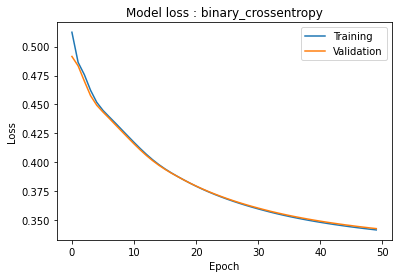

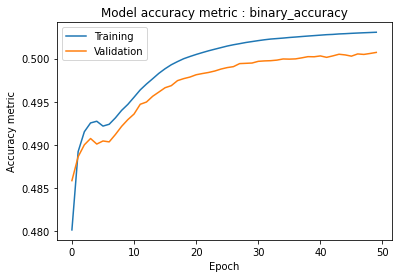

T-shirt


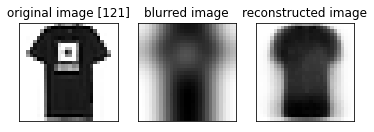

Ankle boot


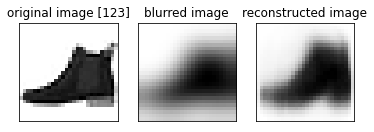

Dress


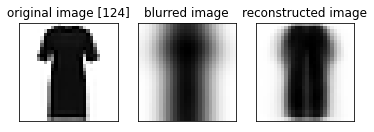

Bag


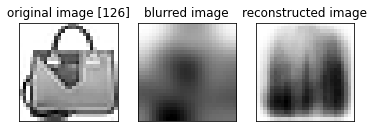

Coat


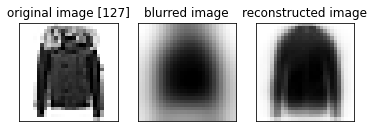

Trouser


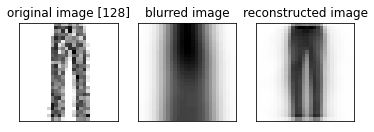

Sandal


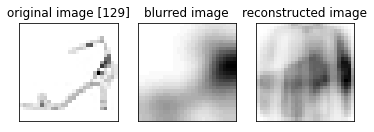

Shirt


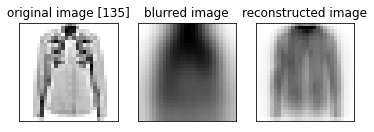

Pullover


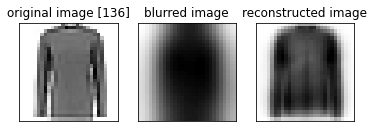

100 hidden nodes
* Training the compiled network *

Epoch 1/50
960/960 [==============================] - 3s 3ms/step - loss: 0.5360 - binary_accuracy: 0.4640 - val_loss: 0.4755 - val_binary_accuracy: 0.4902
Epoch 2/50
960/960 [==============================] - 3s 3ms/step - loss: 0.4637 - binary_accuracy: 0.4943 - val_loss: 0.4397 - val_binary_accuracy: 0.4920
Epoch 3/50
960/960 [==============================] - 3s 3ms/step - loss: 0.4334 - binary_accuracy: 0.4927 - val_loss: 0.4197 - val_binary_accuracy: 0.4930
Epoch 4/50
960/960 [==============================] - 3s 3ms/step - loss: 0.4141 - binary_accuracy: 0.4959 - val_loss: 0.4052 - val_binary_accuracy: 0.4941
Epoch 5/50
960/960 [==============================] - 3s 3ms/step - loss: 0.4008 - binary_accuracy: 0.4980 - val_loss: 0.3947 - val_binary_accuracy: 0.4945
Epoch 6/50
960/960 [==============================] - 3s 3ms/step - loss: 0.3913 - binary_accuracy: 0.4971 - val_loss: 0.3863 - val_binary_accuracy: 0.4956
Epoch 7/50
9

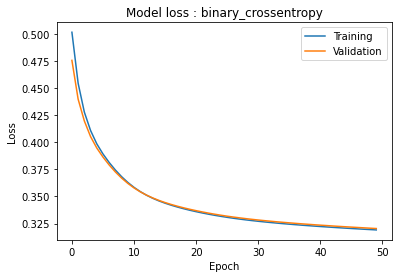

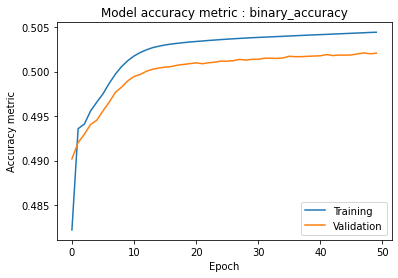

T-shirt


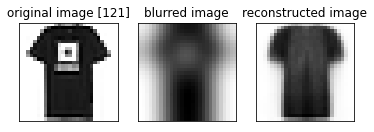

Ankle boot


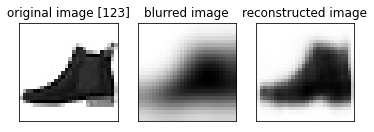

Dress


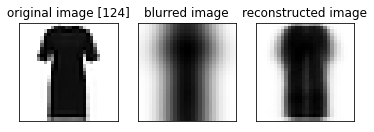

Bag


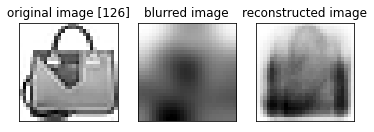

Coat


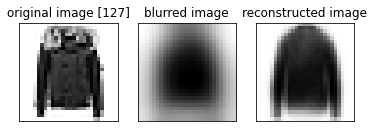

Trouser


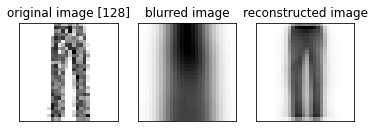

Sandal


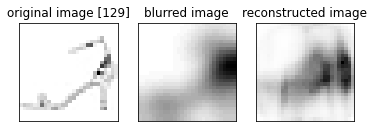

Shirt


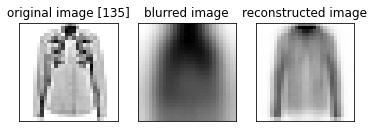

Pullover


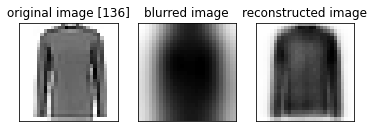

150 hidden nodes
* Training the compiled network *

Epoch 1/50
960/960 [==============================] - 4s 3ms/step - loss: 0.5256 - binary_accuracy: 0.4704 - val_loss: 0.4588 - val_binary_accuracy: 0.4921
Epoch 2/50
960/960 [==============================] - 3s 3ms/step - loss: 0.4441 - binary_accuracy: 0.4952 - val_loss: 0.4166 - val_binary_accuracy: 0.4927
Epoch 3/50
960/960 [==============================] - 3s 3ms/step - loss: 0.4099 - binary_accuracy: 0.4950 - val_loss: 0.3970 - val_binary_accuracy: 0.4938
Epoch 4/50
960/960 [==============================] - 3s 3ms/step - loss: 0.3934 - binary_accuracy: 0.4953 - val_loss: 0.3856 - val_binary_accuracy: 0.4949
Epoch 5/50
960/960 [==============================] - 3s 3ms/step - loss: 0.3817 - binary_accuracy: 0.4983 - val_loss: 0.3768 - val_binary_accuracy: 0.4961
Epoch 6/50
960/960 [==============================] - 3s 3ms/step - loss: 0.3735 - binary_accuracy: 0.4988 - val_loss: 0.3689 - val_binary_accuracy: 0.4976
Epoch 7/50
9

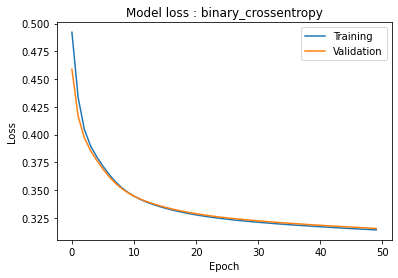

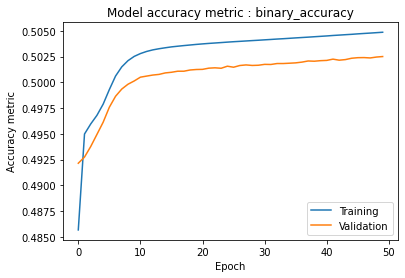

T-shirt


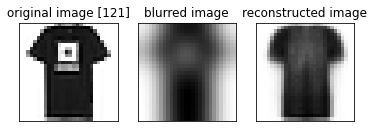

Ankle boot


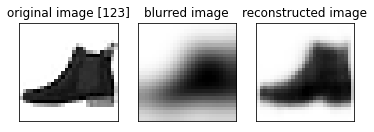

Dress


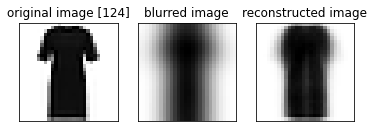

Bag


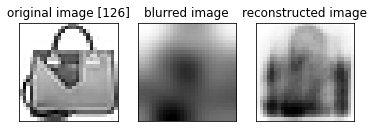

Coat


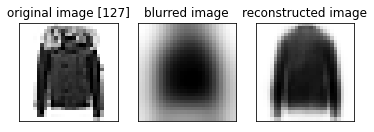

Trouser


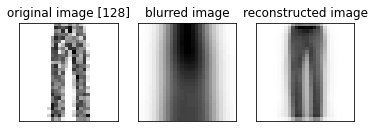

Sandal


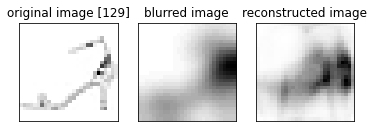

Shirt


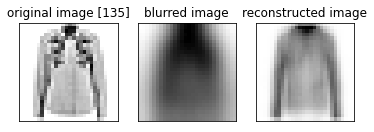

Pullover


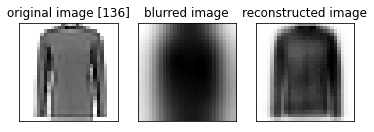

200 hidden nodes
* Training the compiled network *

Epoch 1/50
960/960 [==============================] - 4s 3ms/step - loss: 0.5184 - binary_accuracy: 0.4721 - val_loss: 0.4421 - val_binary_accuracy: 0.4932
Epoch 2/50
960/960 [==============================] - 3s 3ms/step - loss: 0.4277 - binary_accuracy: 0.4961 - val_loss: 0.4025 - val_binary_accuracy: 0.4942
Epoch 3/50
960/960 [==============================] - 3s 3ms/step - loss: 0.3962 - binary_accuracy: 0.4976 - val_loss: 0.3864 - val_binary_accuracy: 0.4949
Epoch 4/50
960/960 [==============================] - 3s 3ms/step - loss: 0.3835 - binary_accuracy: 0.4964 - val_loss: 0.3767 - val_binary_accuracy: 0.4961
Epoch 5/50
960/960 [==============================] - 3s 3ms/step - loss: 0.3733 - binary_accuracy: 0.4988 - val_loss: 0.3684 - val_binary_accuracy: 0.4972
Epoch 6/50
960/960 [==============================] - 3s 3ms/step - loss: 0.3650 - binary_accuracy: 0.5000 - val_loss: 0.3609 - val_binary_accuracy: 0.4985
Epoch 7/50
9

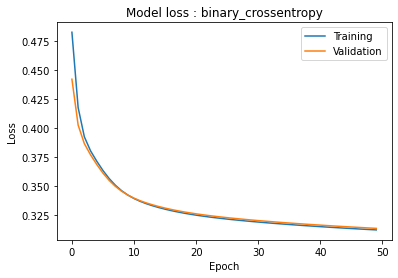

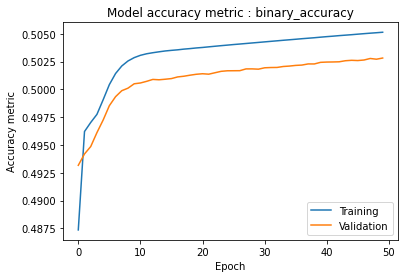

T-shirt


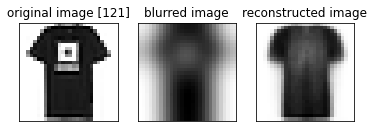

Ankle boot


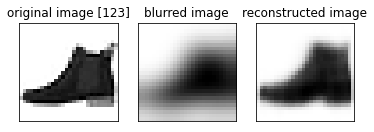

Dress


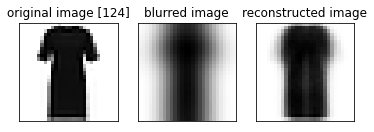

Bag


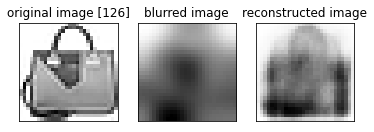

Coat


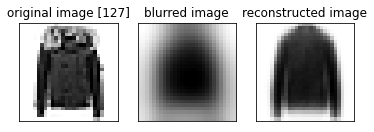

Trouser


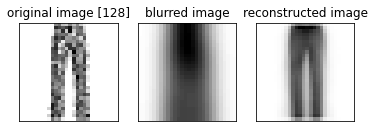

Sandal


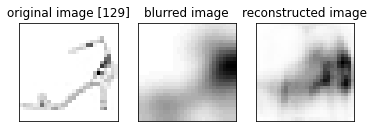

Shirt


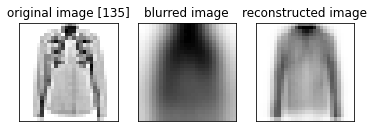

Pullover


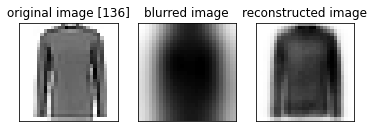

250 hidden nodes
* Training the compiled network *

Epoch 1/50
960/960 [==============================] - 4s 4ms/step - loss: 0.5122 - binary_accuracy: 0.4746 - val_loss: 0.4332 - val_binary_accuracy: 0.4947
Epoch 2/50
960/960 [==============================] - 3s 3ms/step - loss: 0.4187 - binary_accuracy: 0.4972 - val_loss: 0.3949 - val_binary_accuracy: 0.4953
Epoch 3/50
960/960 [==============================] - 3s 3ms/step - loss: 0.3895 - binary_accuracy: 0.4974 - val_loss: 0.3799 - val_binary_accuracy: 0.4961
Epoch 4/50
960/960 [==============================] - 3s 3ms/step - loss: 0.3762 - binary_accuracy: 0.4982 - val_loss: 0.3699 - val_binary_accuracy: 0.4972
Epoch 5/50
960/960 [==============================] - 3s 3ms/step - loss: 0.3670 - binary_accuracy: 0.4993 - val_loss: 0.3614 - val_binary_accuracy: 0.4986
Epoch 6/50
960/960 [==============================] - 3s 3ms/step - loss: 0.3583 - binary_accuracy: 0.5009 - val_loss: 0.3543 - val_binary_accuracy: 0.4995
Epoch 7/50
9

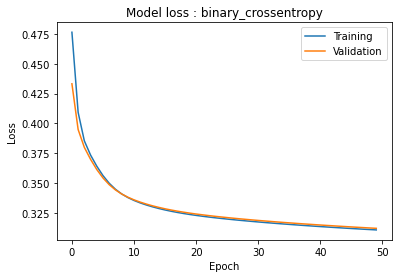

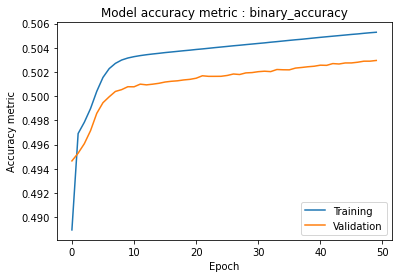

T-shirt


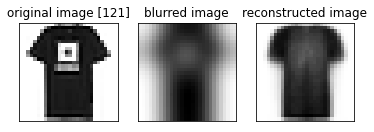

Ankle boot


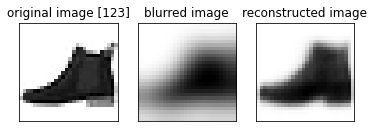

Dress


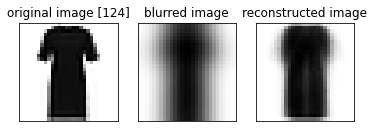

Bag


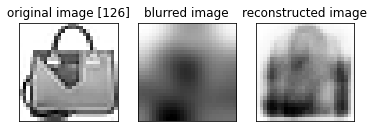

Coat


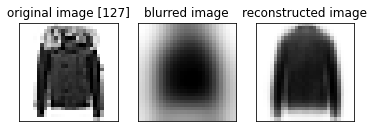

Trouser


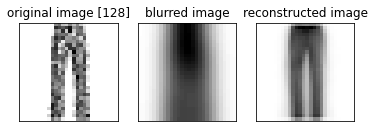

Sandal


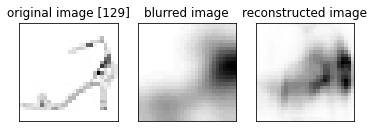

Shirt


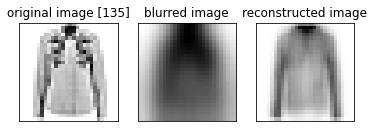

Pullover


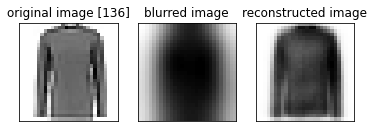

300 hidden nodes
* Training the compiled network *

Epoch 1/50
960/960 [==============================] - 4s 4ms/step - loss: 0.5070 - binary_accuracy: 0.4763 - val_loss: 0.4247 - val_binary_accuracy: 0.4953
Epoch 2/50
960/960 [==============================] - 3s 3ms/step - loss: 0.4114 - binary_accuracy: 0.4973 - val_loss: 0.3895 - val_binary_accuracy: 0.4953
Epoch 3/50
960/960 [==============================] - 3s 3ms/step - loss: 0.3843 - binary_accuracy: 0.4981 - val_loss: 0.3764 - val_binary_accuracy: 0.4961
Epoch 4/50
960/960 [==============================] - 3s 3ms/step - loss: 0.3723 - binary_accuracy: 0.4993 - val_loss: 0.3670 - val_binary_accuracy: 0.4975
Epoch 5/50
960/960 [==============================] - 3s 3ms/step - loss: 0.3637 - binary_accuracy: 0.5005 - val_loss: 0.3587 - val_binary_accuracy: 0.4987
Epoch 6/50
960/960 [==============================] - 3s 3ms/step - loss: 0.3552 - binary_accuracy: 0.5016 - val_loss: 0.3518 - val_binary_accuracy: 0.4996
Epoch 7/50
9

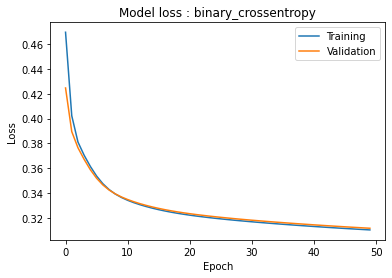

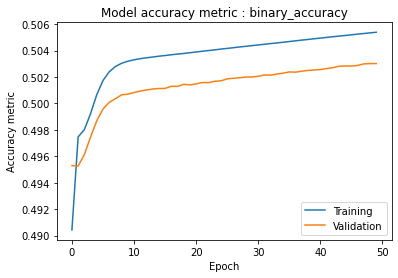

T-shirt


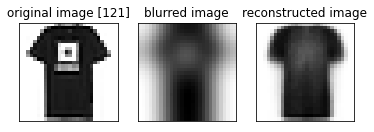

Ankle boot


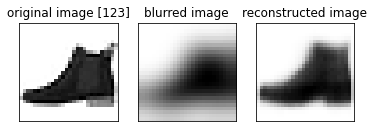

Dress


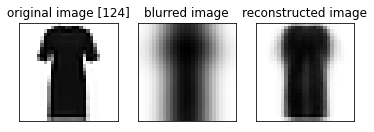

Bag


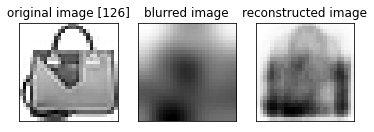

Coat


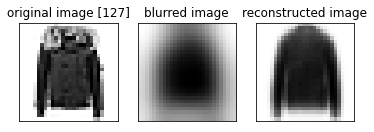

Trouser


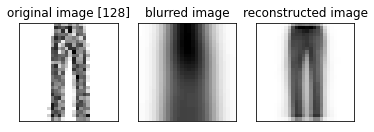

Sandal


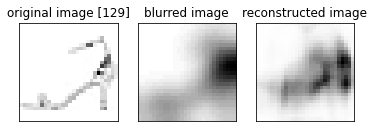

Shirt


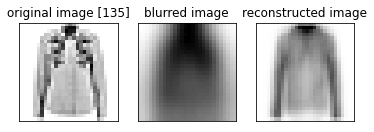

Pullover


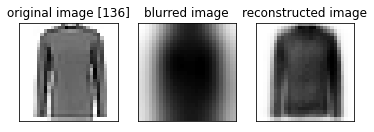

350 hidden nodes
* Training the compiled network *

Epoch 1/50
960/960 [==============================] - 4s 4ms/step - loss: 0.5029 - binary_accuracy: 0.4786 - val_loss: 0.4194 - val_binary_accuracy: 0.4955
Epoch 2/50
960/960 [==============================] - 4s 4ms/step - loss: 0.4064 - binary_accuracy: 0.4983 - val_loss: 0.3861 - val_binary_accuracy: 0.4957
Epoch 3/50
960/960 [==============================] - 3s 4ms/step - loss: 0.3818 - binary_accuracy: 0.4975 - val_loss: 0.3738 - val_binary_accuracy: 0.4965
Epoch 4/50
960/960 [==============================] - 3s 4ms/step - loss: 0.3701 - binary_accuracy: 0.4993 - val_loss: 0.3645 - val_binary_accuracy: 0.4979
Epoch 5/50
960/960 [==============================] - 3s 4ms/step - loss: 0.3606 - binary_accuracy: 0.5016 - val_loss: 0.3565 - val_binary_accuracy: 0.4991
Epoch 6/50
960/960 [==============================] - 3s 4ms/step - loss: 0.3521 - binary_accuracy: 0.5036 - val_loss: 0.3500 - val_binary_accuracy: 0.4997
Epoch 7/50
9

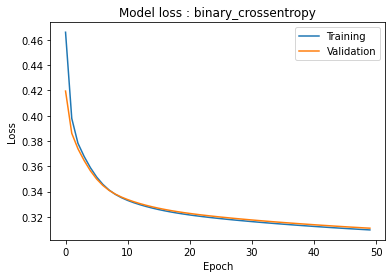

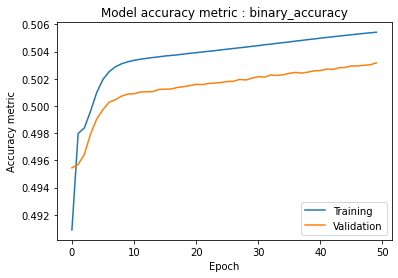

T-shirt


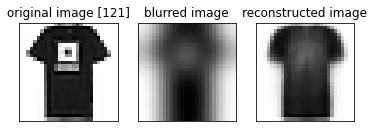

Ankle boot


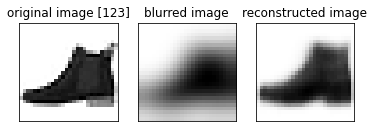

Dress


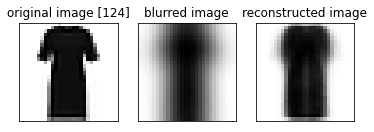

Bag


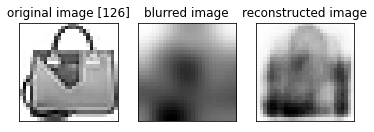

Coat


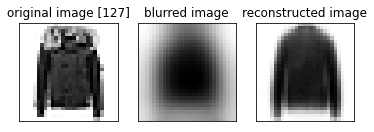

Trouser


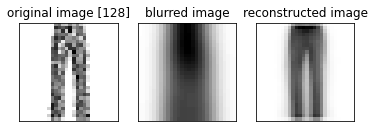

Sandal


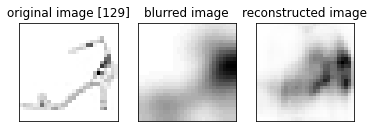

Shirt


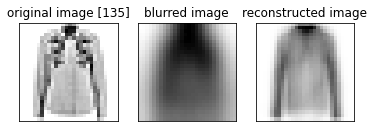

Pullover


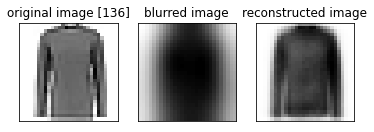

400 hidden nodes
* Training the compiled network *

Epoch 1/50
960/960 [==============================] - 4s 4ms/step - loss: 0.4998 - binary_accuracy: 0.4790 - val_loss: 0.4159 - val_binary_accuracy: 0.4952
Epoch 2/50
960/960 [==============================] - 4s 4ms/step - loss: 0.4035 - binary_accuracy: 0.4978 - val_loss: 0.3842 - val_binary_accuracy: 0.4962
Epoch 3/50
960/960 [==============================] - 4s 4ms/step - loss: 0.3800 - binary_accuracy: 0.4980 - val_loss: 0.3723 - val_binary_accuracy: 0.4965
Epoch 4/50
960/960 [==============================] - 4s 4ms/step - loss: 0.3688 - binary_accuracy: 0.4984 - val_loss: 0.3627 - val_binary_accuracy: 0.4980
Epoch 5/50
960/960 [==============================] - 4s 4ms/step - loss: 0.3597 - binary_accuracy: 0.5001 - val_loss: 0.3543 - val_binary_accuracy: 0.4993
Epoch 6/50
960/960 [==============================] - 4s 4ms/step - loss: 0.3509 - binary_accuracy: 0.5020 - val_loss: 0.3478 - val_binary_accuracy: 0.4999
Epoch 7/50
9

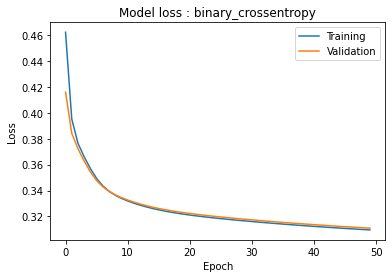

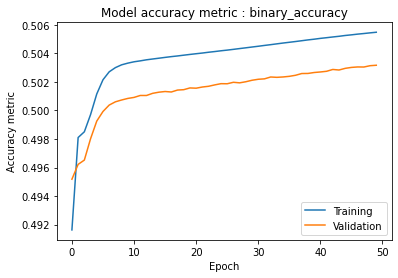

T-shirt


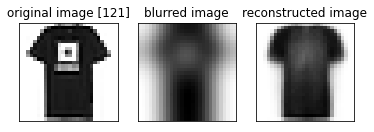

Ankle boot


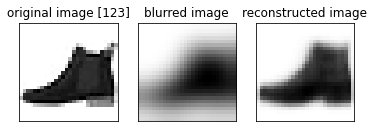

Dress


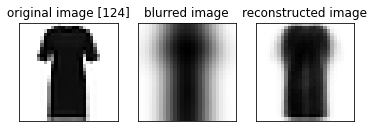

Bag


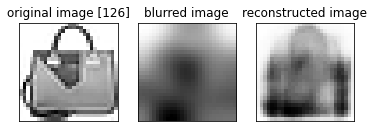

Coat


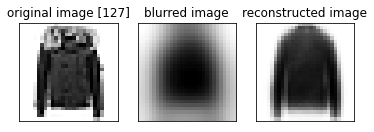

Trouser


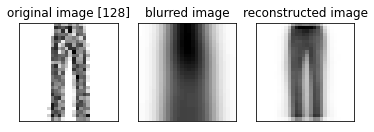

Sandal


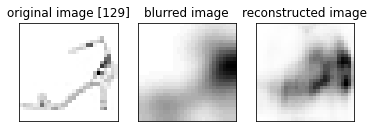

Shirt


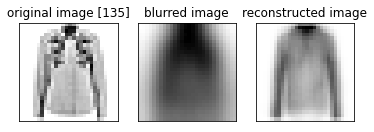

Pullover


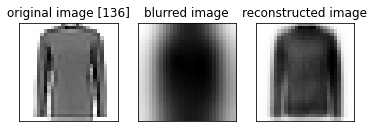

450 hidden nodes
* Training the compiled network *

Epoch 1/50
960/960 [==============================] - 4s 4ms/step - loss: 0.4971 - binary_accuracy: 0.4822 - val_loss: 0.4131 - val_binary_accuracy: 0.4953
Epoch 2/50
960/960 [==============================] - 4s 4ms/step - loss: 0.4006 - binary_accuracy: 0.4988 - val_loss: 0.3821 - val_binary_accuracy: 0.4959
Epoch 3/50
960/960 [==============================] - 4s 4ms/step - loss: 0.3781 - binary_accuracy: 0.4972 - val_loss: 0.3706 - val_binary_accuracy: 0.4968
Epoch 4/50
960/960 [==============================] - 4s 4ms/step - loss: 0.3670 - binary_accuracy: 0.4993 - val_loss: 0.3612 - val_binary_accuracy: 0.4982
Epoch 5/50
960/960 [==============================] - 4s 4ms/step - loss: 0.3579 - binary_accuracy: 0.5002 - val_loss: 0.3531 - val_binary_accuracy: 0.4995
Epoch 6/50
960/960 [==============================] - 4s 4ms/step - loss: 0.3500 - binary_accuracy: 0.5021 - val_loss: 0.3469 - val_binary_accuracy: 0.5001
Epoch 7/50
9

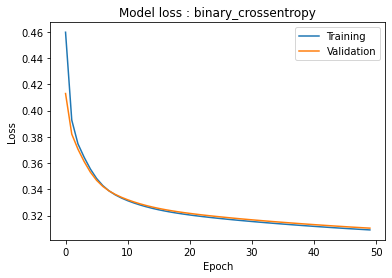

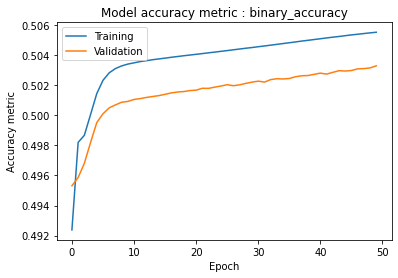

T-shirt


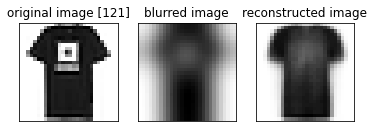

Ankle boot


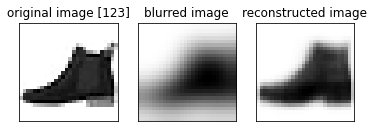

Dress


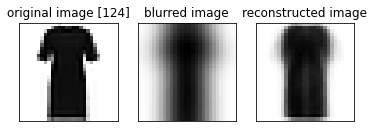

Bag


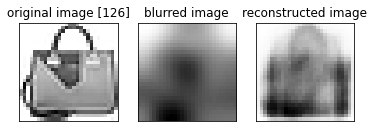

Coat


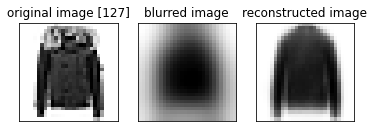

Trouser


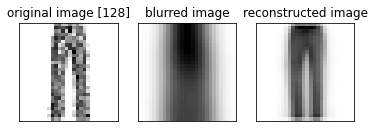

Sandal


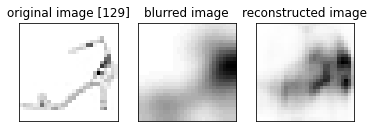

Shirt


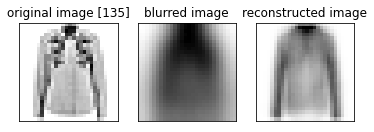

Pullover


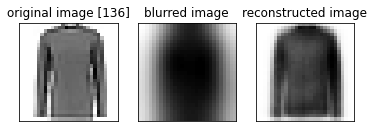

500 hidden nodes
* Training the compiled network *

Epoch 1/50
960/960 [==============================] - 4s 4ms/step - loss: 0.4949 - binary_accuracy: 0.4812 - val_loss: 0.4110 - val_binary_accuracy: 0.4962
Epoch 2/50
960/960 [==============================] - 4s 4ms/step - loss: 0.3988 - binary_accuracy: 0.4988 - val_loss: 0.3809 - val_binary_accuracy: 0.4959
Epoch 3/50
960/960 [==============================] - 4s 4ms/step - loss: 0.3748 - binary_accuracy: 0.5005 - val_loss: 0.3696 - val_binary_accuracy: 0.4970
Epoch 4/50
960/960 [==============================] - 4s 4ms/step - loss: 0.3651 - binary_accuracy: 0.5011 - val_loss: 0.3601 - val_binary_accuracy: 0.4985
Epoch 5/50
960/960 [==============================] - 4s 4ms/step - loss: 0.3572 - binary_accuracy: 0.5004 - val_loss: 0.3520 - val_binary_accuracy: 0.4996
Epoch 6/50
960/960 [==============================] - 4s 4ms/step - loss: 0.3489 - binary_accuracy: 0.5021 - val_loss: 0.3460 - val_binary_accuracy: 0.5003
Epoch 7/50
9

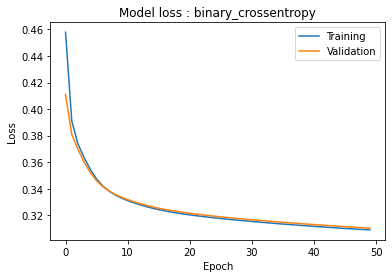

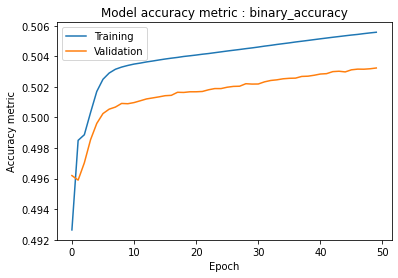

T-shirt


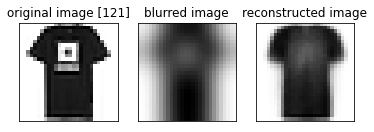

Ankle boot


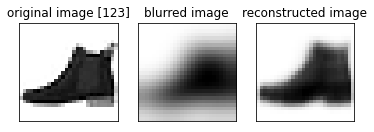

Dress


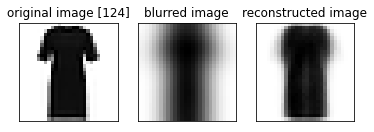

Bag


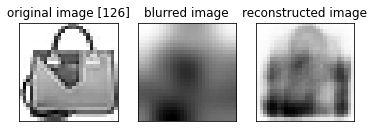

Coat


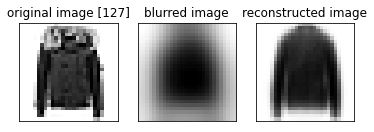

Trouser


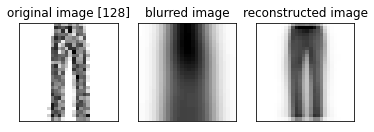

Sandal


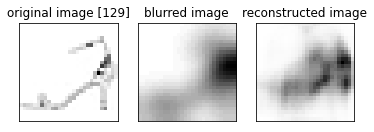

Shirt


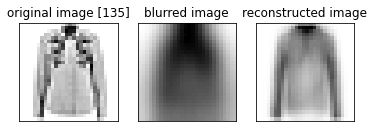

Pullover


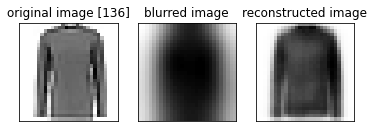

600 hidden nodes
* Training the compiled network *

Epoch 1/50
960/960 [==============================] - 5s 4ms/step - loss: 0.4899 - binary_accuracy: 0.4831 - val_loss: 0.4058 - val_binary_accuracy: 0.4961
Epoch 2/50
960/960 [==============================] - 4s 4ms/step - loss: 0.3945 - binary_accuracy: 0.4988 - val_loss: 0.3784 - val_binary_accuracy: 0.4963
Epoch 3/50
960/960 [==============================] - 4s 4ms/step - loss: 0.3743 - binary_accuracy: 0.4989 - val_loss: 0.3673 - val_binary_accuracy: 0.4974
Epoch 4/50
960/960 [==============================] - 4s 4ms/step - loss: 0.3636 - binary_accuracy: 0.4998 - val_loss: 0.3577 - val_binary_accuracy: 0.4989
Epoch 5/50
960/960 [==============================] - 4s 4ms/step - loss: 0.3543 - binary_accuracy: 0.5013 - val_loss: 0.3500 - val_binary_accuracy: 0.4999
Epoch 6/50
960/960 [==============================] - 4s 4ms/step - loss: 0.3472 - binary_accuracy: 0.5020 - val_loss: 0.3443 - val_binary_accuracy: 0.5004
Epoch 7/50
9

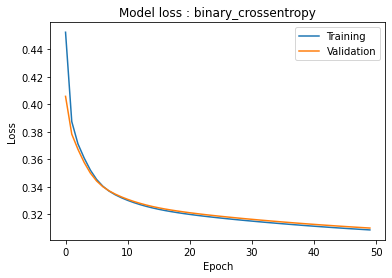

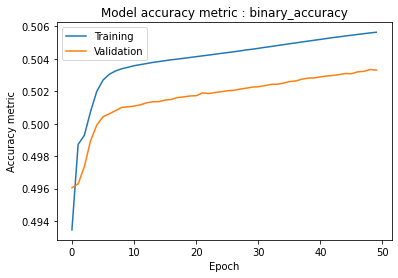

T-shirt


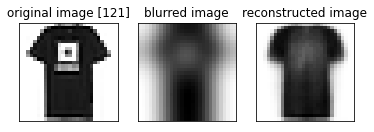

Ankle boot


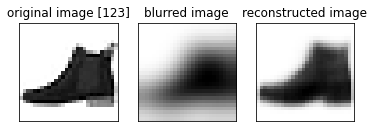

Dress


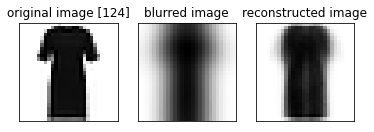

Bag


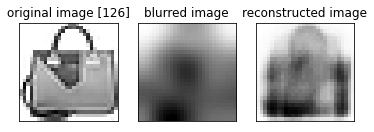

Coat


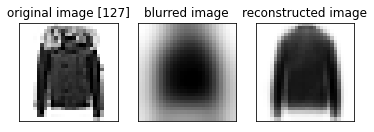

Trouser


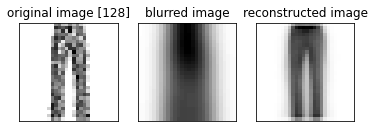

Sandal


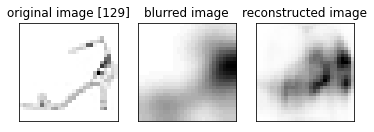

Shirt


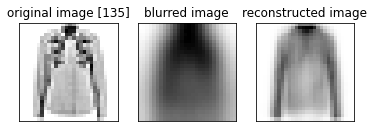

Pullover


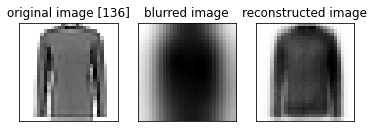

700 hidden nodes
* Training the compiled network *

Epoch 1/50
960/960 [==============================] - 5s 4ms/step - loss: 0.4864 - binary_accuracy: 0.4842 - val_loss: 0.4027 - val_binary_accuracy: 0.4962
Epoch 2/50
960/960 [==============================] - 4s 4ms/step - loss: 0.3917 - binary_accuracy: 0.4992 - val_loss: 0.3768 - val_binary_accuracy: 0.4964
Epoch 3/50
960/960 [==============================] - 4s 4ms/step - loss: 0.3732 - binary_accuracy: 0.4981 - val_loss: 0.3657 - val_binary_accuracy: 0.4976
Epoch 4/50
960/960 [==============================] - 4s 4ms/step - loss: 0.3619 - binary_accuracy: 0.5001 - val_loss: 0.3559 - val_binary_accuracy: 0.4991
Epoch 5/50
960/960 [==============================] - 4s 4ms/step - loss: 0.3520 - binary_accuracy: 0.5025 - val_loss: 0.3483 - val_binary_accuracy: 0.5000
Epoch 6/50
960/960 [==============================] - 4s 4ms/step - loss: 0.3449 - binary_accuracy: 0.5027 - val_loss: 0.3428 - val_binary_accuracy: 0.5005
Epoch 7/50
9

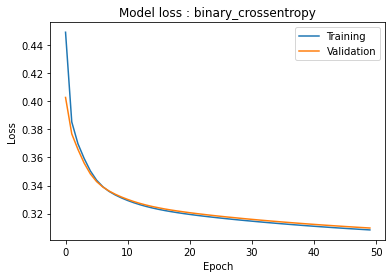

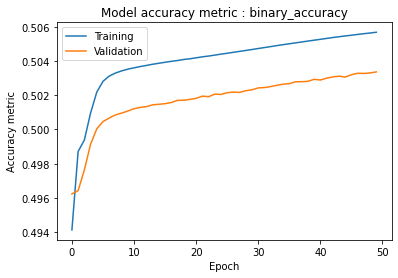

T-shirt


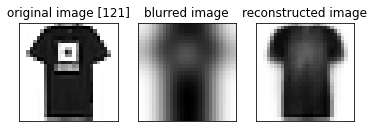

Ankle boot


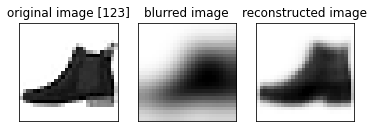

Dress


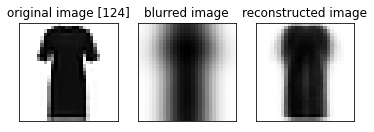

Bag


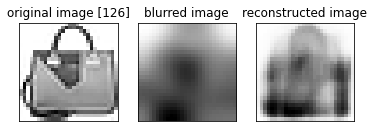

Coat


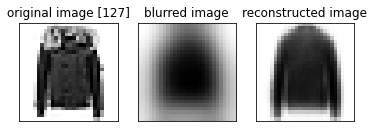

Trouser


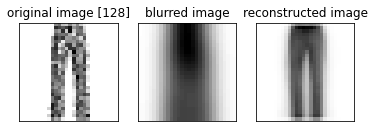

Sandal


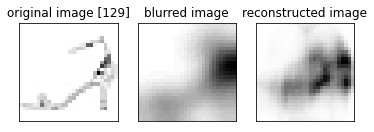

Shirt


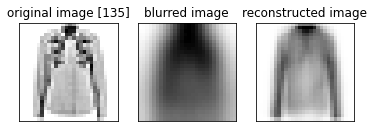

Pullover


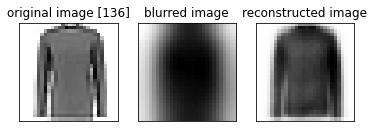

800 hidden nodes
* Training the compiled network *

Epoch 1/50
960/960 [==============================] - 5s 4ms/step - loss: 0.4834 - binary_accuracy: 0.4850 - val_loss: 0.3999 - val_binary_accuracy: 0.4960
Epoch 2/50
960/960 [==============================] - 4s 4ms/step - loss: 0.3891 - binary_accuracy: 0.4999 - val_loss: 0.3759 - val_binary_accuracy: 0.4963
Epoch 3/50
960/960 [==============================] - 4s 4ms/step - loss: 0.3714 - binary_accuracy: 0.4992 - val_loss: 0.3649 - val_binary_accuracy: 0.4977
Epoch 4/50
960/960 [==============================] - 4s 4ms/step - loss: 0.3614 - binary_accuracy: 0.5000 - val_loss: 0.3552 - val_binary_accuracy: 0.4994
Epoch 5/50
960/960 [==============================] - 4s 4ms/step - loss: 0.3516 - binary_accuracy: 0.5020 - val_loss: 0.3477 - val_binary_accuracy: 0.5002
Epoch 6/50
960/960 [==============================] - 4s 4ms/step - loss: 0.3444 - binary_accuracy: 0.5033 - val_loss: 0.3424 - val_binary_accuracy: 0.5006
Epoch 7/50
9

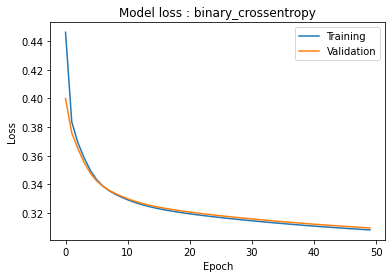

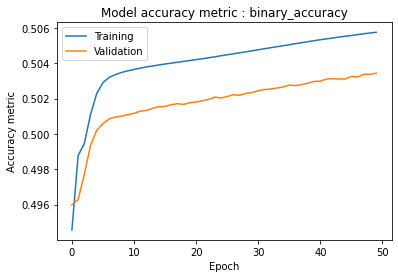

T-shirt


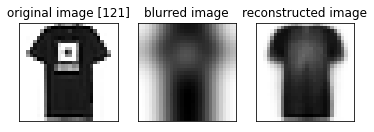

Ankle boot


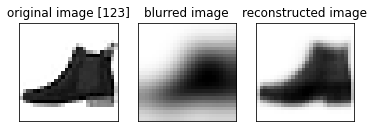

Dress


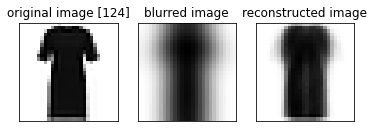

Bag


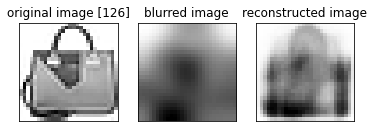

Coat


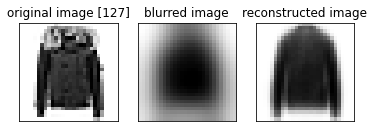

Trouser


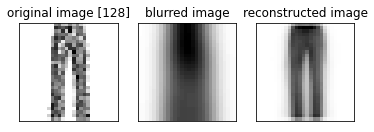

Sandal


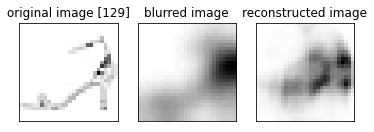

Shirt


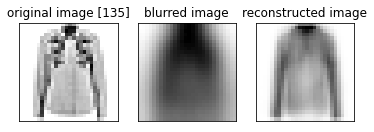

Pullover


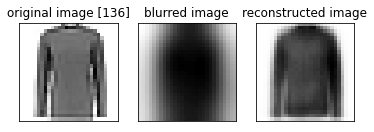

1000 hidden nodes
* Training the compiled network *

Epoch 1/50
960/960 [==============================] - 5s 5ms/step - loss: 0.4779 - binary_accuracy: 0.4881 - val_loss: 0.3961 - val_binary_accuracy: 0.4965
Epoch 2/50
960/960 [==============================] - 4s 5ms/step - loss: 0.3865 - binary_accuracy: 0.4988 - val_loss: 0.3741 - val_binary_accuracy: 0.4963
Epoch 3/50
960/960 [==============================] - 4s 5ms/step - loss: 0.3706 - binary_accuracy: 0.4980 - val_loss: 0.3631 - val_binary_accuracy: 0.4981
Epoch 4/50
960/960 [==============================] - 5s 5ms/step - loss: 0.3592 - binary_accuracy: 0.5006 - val_loss: 0.3534 - val_binary_accuracy: 0.4995
Epoch 5/50
960/960 [==============================] - 4s 5ms/step - loss: 0.3492 - binary_accuracy: 0.5035 - val_loss: 0.3462 - val_binary_accuracy: 0.5002
Epoch 6/50
960/960 [==============================] - 5s 5ms/step - loss: 0.3433 - binary_accuracy: 0.5025 - val_loss: 0.3413 - val_binary_accuracy: 0.5006
Epoch 7/50


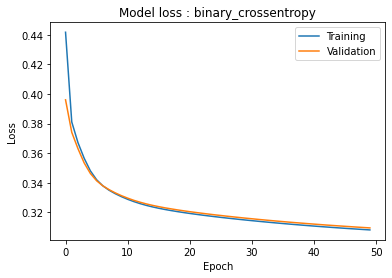

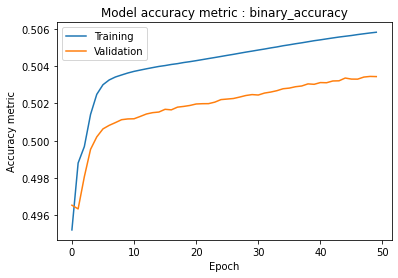

T-shirt


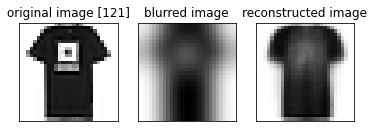

Ankle boot


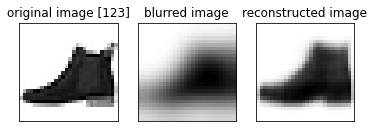

Dress


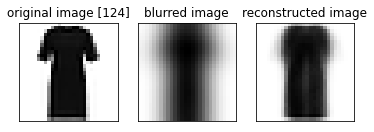

Bag


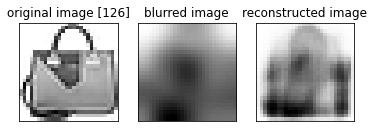

Coat


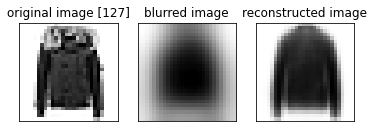

Trouser


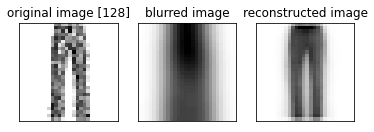

Sandal


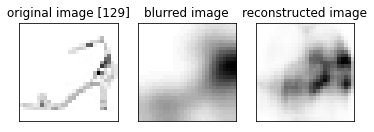

Shirt


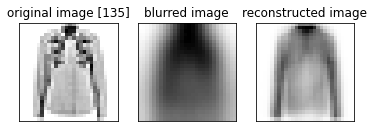

Pullover


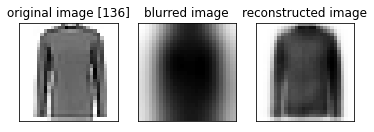

In [15]:
NHN = [50,100,150,200,250,300,350,400,450,500,600,700,800,1000]
ACC=[] ; LOSS=[]
for num_hidden_nodes in NHN:

  print(num_hidden_nodes, 'hidden nodes')

  input_shape = (28, 28, 1)
  inputs = Input(shape=input_shape)

  flatten = Flatten()(inputs)   # 784 nodes = 28x28

  dense_01 = Dense(num_hidden_nodes)(flatten)
  dense_01 = Activation('sigmoid')(dense_01)
  dense_01 = Dropout(dropout_ratio)(dense_01)

  dense_02 = Dense(784)(dense_01)
  outputs = Activation('sigmoid')(dense_02)

  model = Model(inputs=inputs, outputs=outputs)
  model.compile(optimizer=optimizer_type, loss=loss, metrics=metrics)

  print('* Training the compiled network *')
  print()
  history = model.fit(input_train, output_train, \
                      batch_size=batch_size, \
                      epochs=max_epochs, \
                      validation_split=validtrain_split_ratio, \
                      shuffle=batch_shuffle)

  print()
  print('Training completed')
  print()

  evaluate_model = model.evaluate(x=input_test, y=output_test)
  loss_metric = evaluate_model [0]
  accuracy_metric = evaluate_model [1]
  ACC+=[accuracy_metric] ; LOSS+=[loss_metric]
  print('Accuracy - ' + metrics[0] + ': %0.3f'%accuracy_metric)
  print('Loss - ' + loss + ': %0.3f'%loss_metric)

  # model loss

  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title('Model loss : ' + loss)
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Training', 'Validation'], loc='best')
  plt.show()
  plt.close()

  # model accuracy metric

  plt.plot(np.array(history.history[metrics[0]]))
  plt.plot(np.array(history.history['val_' + metrics[0]]))
  plt.title('Model accuracy metric : ' + metrics[0])
  plt.ylabel('Accuracy metric')
  plt.xlabel('Epoch')
  plt.legend(['Training', 'Validation'], loc='best')
  plt.show()
  plt.close()

  name=['T-shirt', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

  test_ids = [121,123,124,126,127,128,129,135,136]
  for test_id in test_ids:
    input_predict = np.zeros(shape=(1, 28, 28, 1))  # create numpy array of required dimensions for network input

    input_predict[0, :, :,0] = input_test[test_id, :, :]  # reshaping test input image
    print(name[output_test_class[test_id]])
    output_predict = model.predict(input_predict).reshape(28,28)  # softmax distribution of predicted class

    plt.subplot(133);plt.imshow(output_predict, cmap=plt.cm.binary)
    plt.title('reconstructed image')
    plt.grid(None)
    plt.xticks([])
    plt.yticks([])
    plt.subplot(132);plt.imshow(input_test[test_id, :, :], cmap=plt.cm.binary)
    plt.title('blurred image')
    plt.grid(None)
    plt.xticks([])
    plt.yticks([])
    plt.subplot(131);plt.imshow(input_test_keep[test_id, :, :,0], cmap=plt.cm.binary)
    plt.title('original image [' + str(test_id) + ']')
    plt.grid(None)
    plt.xticks([])
    plt.yticks([])
    plt.show()

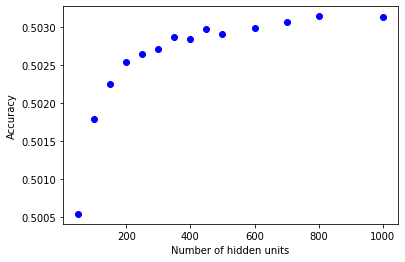

Text(0, 0.5, 'Loss')

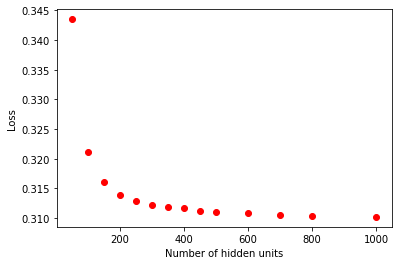

In [16]:
NHNo=[50,100,150,200,250,300,350,400,450,500,600,700,800,1000]
plt.plot(NHNo,ACC,'bo')
plt.xlabel('Number of hidden units')
plt.ylabel('Accuracy')
plt.show()
plt.plot(NHNo,LOSS,'ro')
plt.xlabel('Number of hidden units')
plt.ylabel('Loss')

In [17]:
## The optimal number of hidden units seems to be around 500. 
## Beyond this number we don't gain anything by adding units.

In [18]:
optimizer_type = SGD(lr=1)  # optimisation algorithm: SGD stochastic gradient decent 
loss = 'binary_crossentropy'  # loss (cost) function to be minimised by the optimiser
metrics = ['binary_accuracy']  # network accuracy metric to be determined after each epoch
dropout_ratio = 0.0  # % of nodes in the hidden layer to dropout during back-propagation update of the network weights
validtrain_split_ratio = 0.2  # % of the seen dataset to be put aside for validation, rest is for training
max_epochs = 300  # maxmimum number of epochs to be iterated
batch_size = 50   # batch size for the training data set
batch_shuffle = True   # shuffle the training data prior to batching before each epoch

500 hidden nodes
* Training the compiled network *

Epoch 1/300
960/960 [==============================] - 4s 4ms/step - loss: 0.4947 - binary_accuracy: 0.4795 - val_loss: 0.4098 - val_binary_accuracy: 0.4960
Epoch 2/300
960/960 [==============================] - 3s 3ms/step - loss: 0.3973 - binary_accuracy: 0.4994 - val_loss: 0.3806 - val_binary_accuracy: 0.4960
Epoch 3/300
960/960 [==============================] - 3s 4ms/step - loss: 0.3757 - binary_accuracy: 0.4987 - val_loss: 0.3694 - val_binary_accuracy: 0.4970
Epoch 4/300
960/960 [==============================] - 3s 4ms/step - loss: 0.3657 - binary_accuracy: 0.5002 - val_loss: 0.3599 - val_binary_accuracy: 0.4986
Epoch 5/300
960/960 [==============================] - 3s 4ms/step - loss: 0.3568 - binary_accuracy: 0.5000 - val_loss: 0.3519 - val_binary_accuracy: 0.4997
Epoch 6/300
960/960 [==============================] - 3s 3ms/step - loss: 0.3490 - binary_accuracy: 0.5012 - val_loss: 0.3459 - val_binary_accuracy: 0.5002
Epoch 

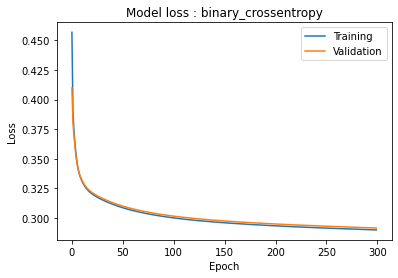

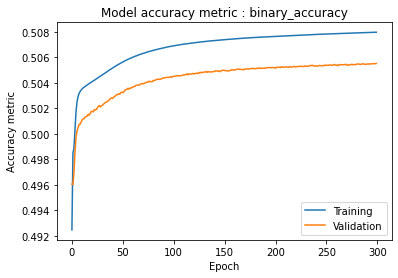

T-shirt


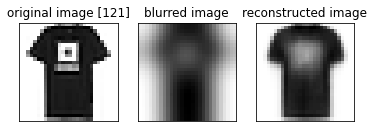

Ankle boot


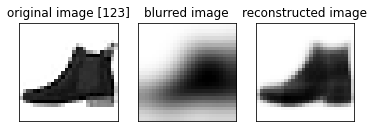

Dress


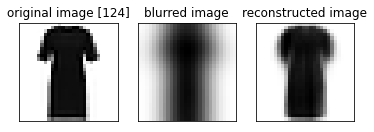

Bag


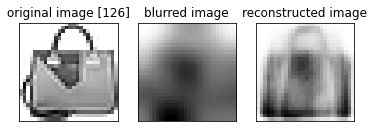

Coat


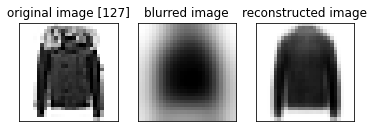

Trouser


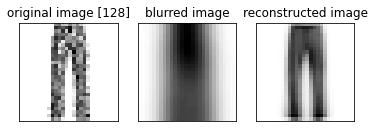

Sandal


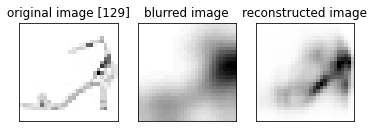

Shirt


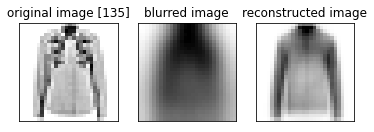

Pullover


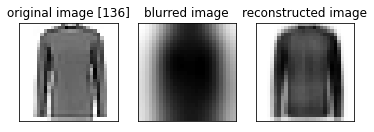

In [19]:
NHNopt = [500]

for num_hidden_nodes in NHNopt:

  print(num_hidden_nodes, 'hidden nodes')

  input_shape = (28, 28, 1)
  inputs = Input(shape=input_shape)

  flatten = Flatten()(inputs)   # 784 nodes = 28x28

  dense_01 = Dense(num_hidden_nodes)(flatten)
  dense_01 = Activation('sigmoid')(dense_01)
  dense_01 = Dropout(dropout_ratio)(dense_01)

  dense_02 = Dense(784)(dense_01)
  outputs = Activation('sigmoid')(dense_02)

  model = Model(inputs=inputs, outputs=outputs)
  model.compile(optimizer=optimizer_type, loss=loss, metrics=metrics)

  print('* Training the compiled network *')
  print()
  history = model.fit(input_train, output_train, \
                      batch_size=batch_size, \
                      epochs=max_epochs, \
                      validation_split=validtrain_split_ratio, \
                      shuffle=batch_shuffle)

  print()
  print('Training completed')
  print()

  evaluate_model = model.evaluate(x=input_test, y=output_test)
  loss_metric = evaluate_model [0]
  accuracy_metric = evaluate_model [1]
  print('Accuracy - ' + metrics[0] + ': %0.3f'%accuracy_metric)
  print('Loss - ' + loss + ': %0.3f'%loss_metric)

  # model loss

  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title('Model loss : ' + loss)
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Training', 'Validation'], loc='best')
  plt.show()
  plt.close()

  # model accuracy metric

  plt.plot(np.array(history.history[metrics[0]]))
  plt.plot(np.array(history.history['val_' + metrics[0]]))
  plt.title('Model accuracy metric : ' + metrics[0])
  plt.ylabel('Accuracy metric')
  plt.xlabel('Epoch')
  plt.legend(['Training', 'Validation'], loc='best')
  plt.show()
  plt.close()

  name=['T-shirt', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

  test_ids = [121,123,124,126,127,128,129,135,136]
  for test_id in test_ids:
    input_predict = np.zeros(shape=(1, 28, 28, 1))  # create numpy array of required dimensions for network input

    input_predict[0, :, :,0] = input_test[test_id, :, :]  # reshaping test input image
    print(name[output_test_class[test_id]])
    output_predict = model.predict(input_predict).reshape(28,28)  # softmax distribution of predicted class

    plt.subplot(133);plt.imshow(output_predict, cmap=plt.cm.binary)
    plt.title('reconstructed image')
    plt.grid(None)
    plt.xticks([])
    plt.yticks([])
    plt.subplot(132);plt.imshow(input_test[test_id, :, :], cmap=plt.cm.binary)
    plt.title('blurred image')
    plt.grid(None)
    plt.xticks([])
    plt.yticks([])
    plt.subplot(131);plt.imshow(input_test_keep[test_id, :, :,0], cmap=plt.cm.binary)
    plt.title('original image [' + str(test_id) + ']')
    plt.grid(None)
    plt.xticks([])
    plt.yticks([])
    plt.show()

In [ ]:
## increased the epoch number to 300 for the optimal number of hidden nodes